<a href="https://colab.research.google.com/github/williammcintosh/machine_learning_projects/blob/main/K-Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Cluster Algorithm

## Will McIntosh

# Explanation

K-means is an unsupervised method of classifying datapoints by recognizing the clusters of datapoints and labeling each datapoints class based on their cluster.

To do this, we initialize a list of centroids (`K` number of them) and position them in random locations.

## Step 1: Assignment Step (i.e., the expectation step)

Assign each observation to the cluster whose mean has the least squared   Euclidean distance, this is intuitively the "nearest" mean. Mathematically, this means partitioning the observations according to the Voroni tessellation generated by the means.  

To do this we:
* Iterate through each datapoint in the dataset
* For each datapoint, calculate the Euclidean distance to each centroid
* Assign that datapoint to the nearest centroid

## Step 2: Update Step (i.e., the parameter maximization step)

Here we move the centroids to the center of the cluster of datapoints in which they are closest to.

To do this we:
* Calculate the center of each unique cluster
* Move the centroid to that location

# Setup

## Imports

In [1]:
import pandas as pd
import numpy as np
import math
import random
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
if os.path.isfile("/content/545_cluster_dataset programming 3.txt") == False:
  !gdown --id 1XIkporl31gJOGU-vyHZZMsYRVh3ylU7p

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1XIkporl31gJOGU-vyHZZMsYRVh3ylU7p
To: /content/545_cluster_dataset programming 3.txt
100% 51.0k/51.0k [00:00<00:00, 35.1MB/s]


## Centroid Class

In [3]:
class Centroid:
  def __init__(self):
    randX = random.uniform(-4, 4)
    randY = random.uniform(-4, 4)
    self.position = np.array([randX, randY])
    self.accumulated_dist = np.array([0.0, 0.0])
    self.datapoint_counts = 0
   
  def Reset_Values(self):
    self.accumulated_dist = np.array([0.0, 0.0])
    self.datapoint_counts = 0

## Helper Functions

In [4]:
def Euclidean(pt1, pt2):
  return math.sqrt(((pt1[0]-pt2[0])**2) + ((pt1[1]-pt2[1])**2))

def GetCentroidCoordinates(cents):
  xcoords = []
  ycoords = []
  for c in cents:
    xcoords.append(c.position[0])
    ycoords.append(c.position[1])
  return np.array([xcoords, ycoords])

def GetCentroidCoordinatesAsNPArrays(cents):
  arrays = []
  for c in cents:
    arrays.append(c.position)
  return arrays

def MakeLabeledDataFrame(funcDF, preds, dists):
  p_df = funcDF.copy(deep=True)
  p_df['Class_Preds'] = preds
  p_df['Sqrd_Dist'] = dists
  return p_df

def PlotClassesAndCentroids(plot_df, cents):
  c_coords = GetCentroidCoordinates(cents)
  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  ax1.scatter(plot_df['x'], plot_df['y'], c=plot_df['Class_Preds'], marker="o", label='first', s=5)
  ax1.scatter(c_coords[0],c_coords[1], c='black', marker="+", label='second', s=200)
  plt.show()

def CalculateAVGMSE(l_df):
  dists = l_df.groupby(by=['Class_Preds'])['Sqrd_Dist'].sum().sort_index()
  counts = l_df['Class_Preds'].value_counts().sort_index()
  mse_df = pd.concat([dists, counts], axis=1)
  # Selects only the rows which have a class count greater than 0
  mse_df = mse_df[mse_df['Class_Preds'] > 0]
  classMSE = []
  for i, row in mse_df.iterrows():
    classMSE.append(row['Sqrd_Dist'] / row['Class_Preds'])
  return sum(classMSE) / mse_df.shape[0]

def CalculateCentroidMovement(cents, pos, k):
  totaldist = 0
  for i, c in enumerate(cents):
    totaldist += Euclidean(pos[i], c.position)
  avg_movement = totaldist / k

# Dataset

In [5]:
df = pd.read_csv("/content/545_cluster_dataset programming 3.txt", header=None, delim_whitespace=True)
df.rename(columns={0: "x", 1: "y"}, inplace=True)

In [6]:
df.head()

,x,y
0,-0.169513,-0.243970
1,-1.462618,-1.333294
2,0.769671,0.849244
3,0.252315,0.560510
4,0.078094,0.453757


In [7]:
df.describe()

,x,y
count,1500.000000,1500.000000
mean,0.614511,0.055975
std,1.278688,1.035507
min,-3.665696,-3.909369
25%,-0.367997,-0.672573
50%,0.627633,0.020810
75%,1.810389,0.763236
max,3.198370,3.851513


# Main Algorithm

## Parameters

In [8]:
# Initial hyperparameters
Kmax = 7
r = 10
epsilom = 0.1

## Main Loop


K = 2
Lowest MSE = 1.4841199734299417


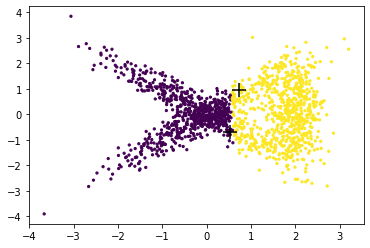


K = 3
Lowest MSE = 0.9126689250655312


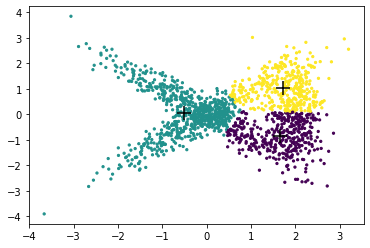


K = 4
Lowest MSE = 0.7014209580663532


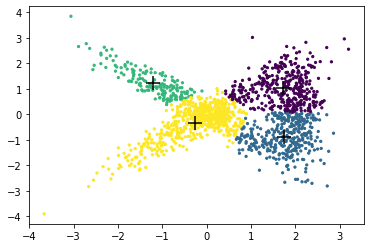


K = 5
Lowest MSE = 0.5529161335376671


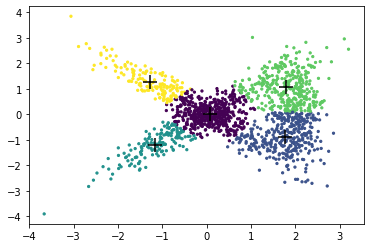


K = 6
Lowest MSE = 0.4565847106786487


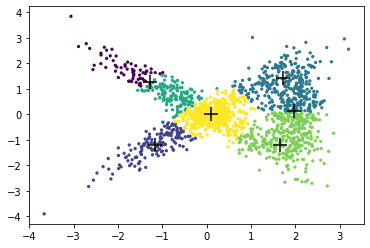

In [9]:
avg_movement = math.inf
min_MSE = math.inf
min_MSE_labeled_df = pd.DataFrame()
min_MSEs = []

for K in range(2,Kmax):

  for RandomPlacements in range(r):

    # Makes a list of centroids, prints initial random positions
    centroids = []
    for i in range(K):
      centroids.append(Centroid())

    for iterations in range(15):

      # Stores centroids previous positions to calculate distance traveled
      prev_pos = GetCentroidCoordinatesAsNPArrays(centroids)
      
      # E-Stage
      for c in centroids:
        c.Reset_Values()
      
      # Store predicted classes
      class_pred = []
      centroid_dist = []

      # Iterate through each datapoint, find the nearest centroid from that datapoint
      for i, row in df.iterrows():
        # Resets the minimum values
        min_length = math.inf
        nearest_centroid = None
        # Compares each length from the row to each centroid
        for c in centroids:
          dist = Euclidean(np.array(row), c.position)
          if dist < min_length:
            min_length = dist
            nearest_centroid = c

        # Assign datapoint to the nearest centroid
        nearest_centroid.accumulated_dist += np.array([row['x'], row['y']])
        nearest_centroid.datapoint_counts += 1
        class_pred.append(centroids.index(nearest_centroid))
        centroid_dist.append(min_length**2)

      labeled_df = MakeLabeledDataFrame(df, class_pred, centroid_dist)
      
      # M-Stage, move the centroids
      for c in centroids:
        count = c.datapoint_counts
        count = count if count > 0.0 else 0.0001
        acc_X = c.accumulated_dist[0] / count
        acc_Y = c.accumulated_dist[1] / count
        c.position = np.copy(np.array([acc_X, acc_Y]))
      
      # Calculate avg_movement by getting the difference between the centroids previous position and their new one
      avg_movement = CalculateCentroidMovement(centroids, prev_pos, K)

      mse = CalculateAVGMSE(labeled_df)

    if mse < min_MSE:
      min_MSE = mse
      min_MSE_labeled_df = labeled_df.copy(deep=True)

  min_MSEs.append(min_MSE)
  print(f"\nK = {K}\nLowest MSE = {min_MSE}")
  PlotClassesAndCentroids(min_MSE_labeled_df, centroids)

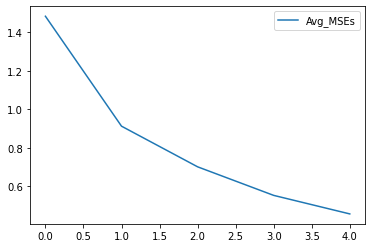

In [10]:
mses_df = pd.DataFrame(min_MSEs, columns=['Avg_MSEs'])
mses_df.plot()